In [7]:
!pip install kagglehub

     ---------------------------------------- 68.0/68.0 KB 3.9 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Jaison\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 67.4k/67.4k [00:00<00:00, 23.0MB/s]

Extracting files...
Path to dataset files: C:\Users\Jaison\.cache\kagglehub\datasets\fedesoriano\stroke-prediction-dataset\versions\1


In [12]:
import kagglehub
import pandas as pd
import os

# Download and get the path to the dataset directory
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

# Inspect files in the downloaded path
print("Files in dataset folder:", os.listdir(path))

# Load the CSV file (adjust filename if needed)
csv_path = os.path.join(path, "healthcare-dataset-stroke-data.csv")
df = pd.read_csv(csv_path)

# Display first few rows
print(df.head())

Files in dataset folder: ['healthcare-dataset-stroke-data.csv']
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4   

In [13]:
display(df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [16]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

Missing BMI values: 201 (3.9% of rows)


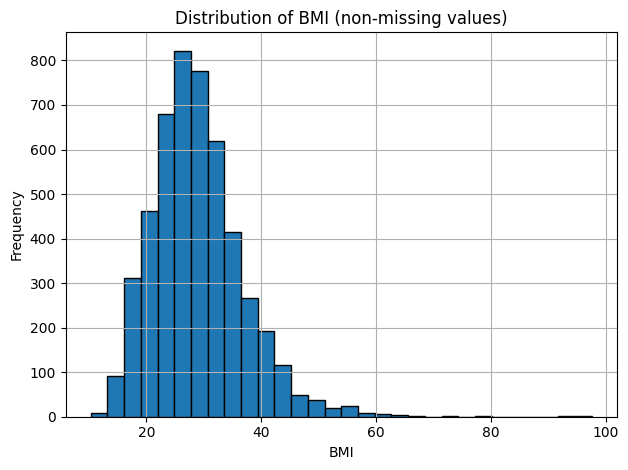

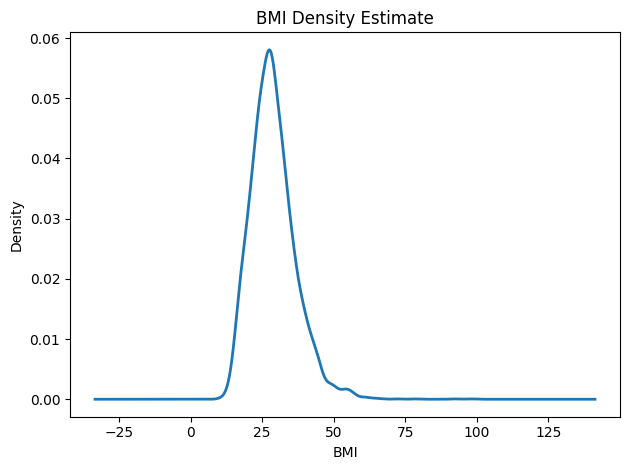

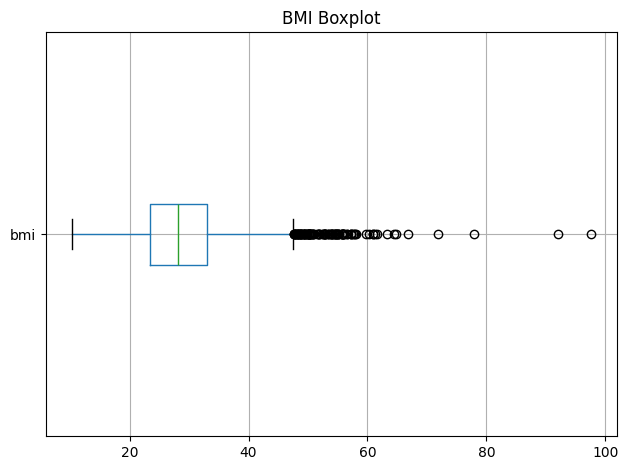

In [17]:
import matplotlib.pyplot as plt

# ── Basic summary ─────────────────────────────────────────────
print(df["bmi"].describe())     # count, mean, std, min, quartiles, max
print(f"\nMissing BMI values: {df['bmi'].isna().sum()} "
      f"({df['bmi'].isna().mean():.1%} of rows)")

# ── Histogram ─────────────────────────────────────────────────
plt.figure()
df["bmi"].hist(bins=30, edgecolor="black")
plt.title("Distribution of BMI (non-missing values)")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# ── Kernel-density curve ─────────────────────────────────────
plt.figure()
df["bmi"].plot(kind="kde", linewidth=2)
plt.title("BMI Density Estimate")
plt.xlabel("BMI")
plt.tight_layout()
plt.show()

# ── Optional: boxplot to spot outliers ───────────────────────
plt.figure()
df.boxplot(column="bmi", vert=False)
plt.title("BMI Boxplot")
plt.tight_layout()
plt.show()

In [18]:
display(df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [19]:
from sklearn.impute import KNNImputer
import pandas as pd

# ⿡  One-hot-encode the categorical features (KNN needs numbers only)
cat_cols = ["gender", "ever_married", "work_type",
            "Residence_type", "smoking_status"]
df_enc = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [21]:
display(df_enc)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,NaN,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0,False,False,True,False,True,False,False,True,False,True,False
5106,44873,81.0,0,0,125.20,40.0,0,False,False,True,False,False,True,False,True,False,True,False
5107,19723,35.0,0,0,82.99,30.6,0,False,False,True,False,False,True,False,False,False,True,False
5108,37544,51.0,0,0,166.29,25.6,0,True,False,True,False,True,False,False,False,True,False,False


In [22]:


# ⿢  Choose the predictors you want KNN to look at when guessing BMI
#     (age + glucose are good proxies; you can add/remove columns freely)
knn_features = ["age", "avg_glucose_level", "bmi"] + \
               [c for c in df_enc.columns if c not in df.columns]  # the encoded dummies

# ⿣  Fit the imputer and transform
imputer = KNNImputer(n_neighbors=5, weights="distance")  # try 3–10 neighbours
df_enc[knn_features] = imputer.fit_transform(df_enc[knn_features])

# ⿤  Copy the imputed BMI back to your original dataframe
df["bmi"] = df_enc["bmi"]

# ⿥  Quick check
print("Remaining NaNs in bmi:", df["bmi"].isna().sum())

Remaining NaNs in bmi: 0


count    5110.000000
mean       28.941754
std         7.768767
min        10.300000
25%        23.700000
50%        28.200000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

Missing BMI values: 0 (0.0% of rows)


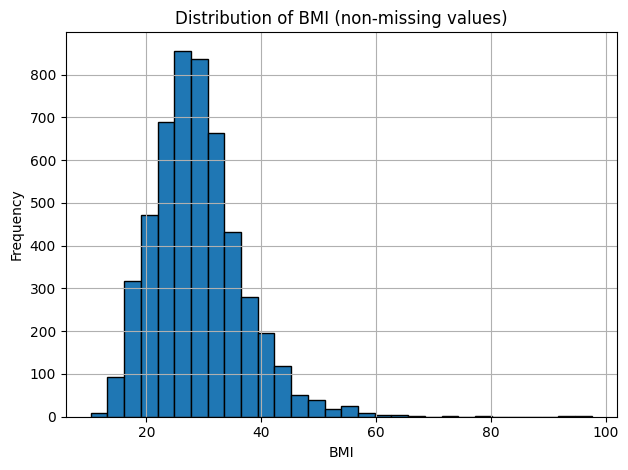

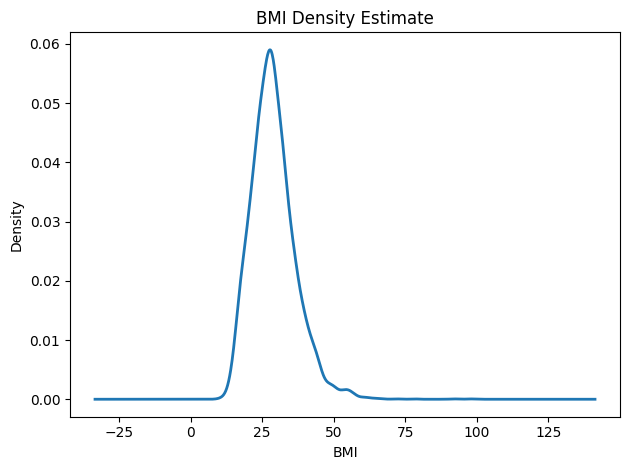

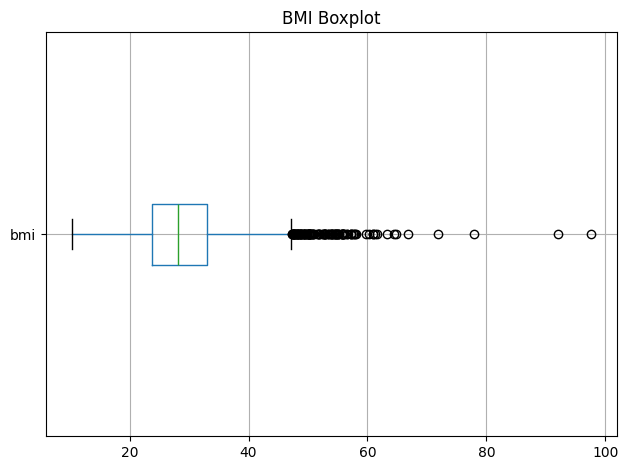

In [23]:
import matplotlib.pyplot as plt

# ── Basic summary ─────────────────────────────────────────────
print(df["bmi"].describe())     # count, mean, std, min, quartiles, max
print(f"\nMissing BMI values: {df['bmi'].isna().sum()} "
      f"({df['bmi'].isna().mean():.1%} of rows)")

# ── Histogram ─────────────────────────────────────────────────
plt.figure()
df["bmi"].hist(bins=30, edgecolor="black")
plt.title("Distribution of BMI (non-missing values)")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# ── Kernel-density curve ─────────────────────────────────────
plt.figure()
df["bmi"].plot(kind="kde", linewidth=2)
plt.title("BMI Density Estimate")
plt.xlabel("BMI")
plt.tight_layout()
plt.show()

# ── Optional: boxplot to spot outliers ───────────────────────
plt.figure()
df.boxplot(column="bmi", vert=False)
plt.title("BMI Boxplot")
plt.tight_layout()
plt.show()

In [24]:
# FEATURE SCALING  –  z-score standardisation of numeric fields
# -------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# --- 1. Pick the numeric columns you want to scale --------------
num_cols = ["age", "avg_glucose_level", "bmi",      # continuous
            "hypertension", "heart_disease"]        # binaries are harmless to scale

# (They must exist in df_enc, the DataFrame returned from
#  the earlier get_dummies + KNN imputation step.)

# --- 2. Fit the scaler on the whole dataset and transform -------
scaler = StandardScaler()
df_enc[num_cols] = scaler.fit_transform(df_enc[num_cols])

# --- 3. OPTIONAL: keep the fitted scaler for later --------------
# e.g. joblib.dump(scaler, "scaler.pkl")  so you can apply the
# same transformation to future / test data:
# import joblib
# joblib.dump(scaler, "scaler.pkl")

# --- 4. Quick sanity-check --------------------------------------
print(df_enc[num_cols].describe().T[['mean', 'std']].round(2))

                   mean  std
age                 0.0  1.0
avg_glucose_level   0.0  1.0
bmi                -0.0  1.0
hypertension       -0.0  1.0
heart_disease       0.0  1.0


In [ ]:
#EDA


AGE  ──────────────────────────────────
count    5.110000e+03
mean     5.005781e-17
std      1.000098e+00
min     -1.908261e+00
25%     -8.061152e-01
50%      7.843218e-02
75%      7.860701e-01
max      1.714845e+00
Name: age, dtype: float64 



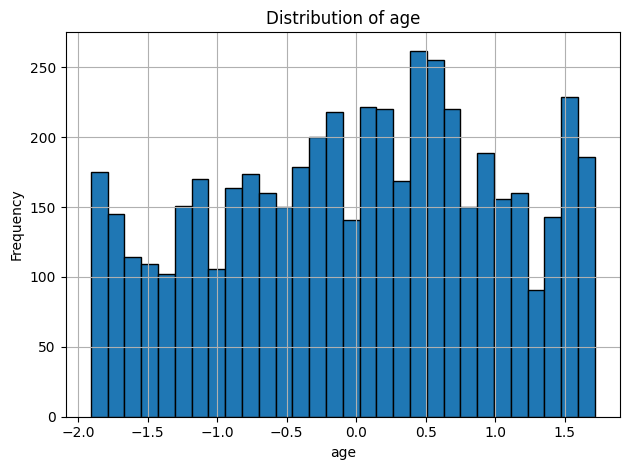

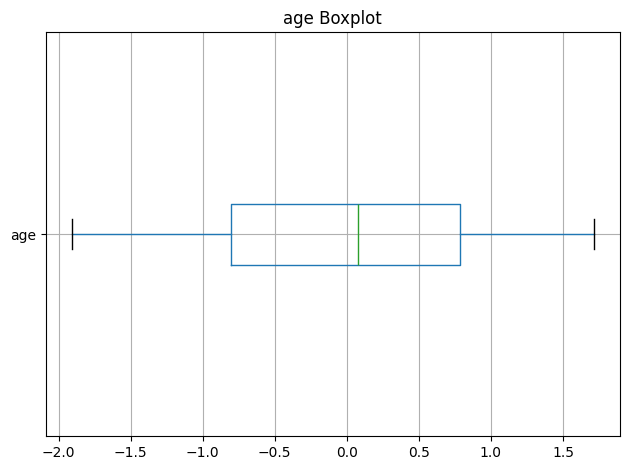


BMI  ──────────────────────────────────
count    5.110000e+03
mean    -1.251445e-16
std      1.000098e+00
min     -2.399812e+00
25%     -6.747875e-01
50%     -9.548828e-02
75%      5.353042e-01
max      8.838593e+00
Name: bmi, dtype: float64 



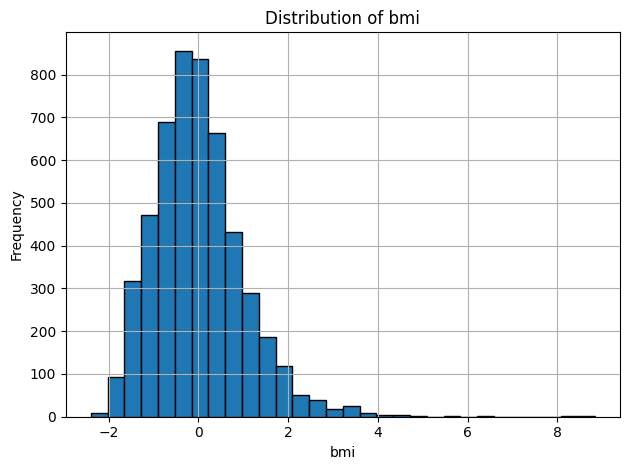

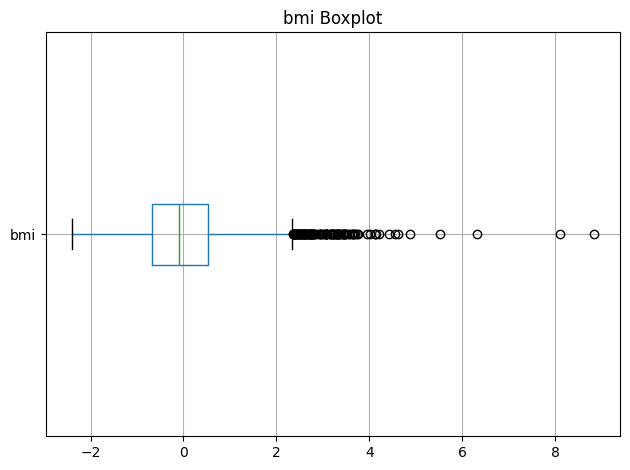


AVG_GLUCOSE_LEVEL  ──────────────────────────────────
count    5.110000e+03
mean     1.001156e-16
std      1.000098e+00
min     -1.126958e+00
25%     -6.383223e-01
50%     -3.149945e-01
75%      1.754080e-01
max      3.657145e+00
Name: avg_glucose_level, dtype: float64 



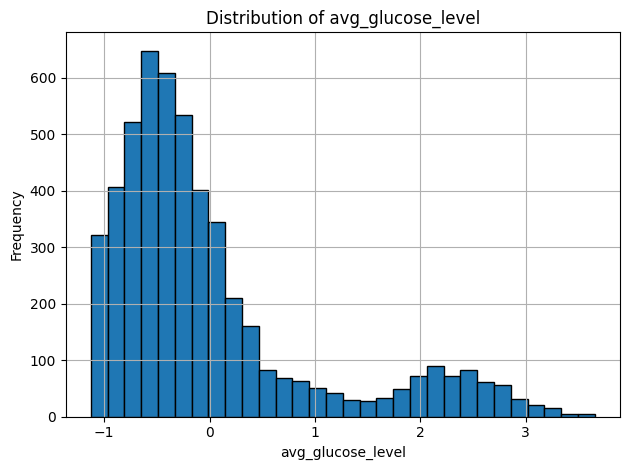

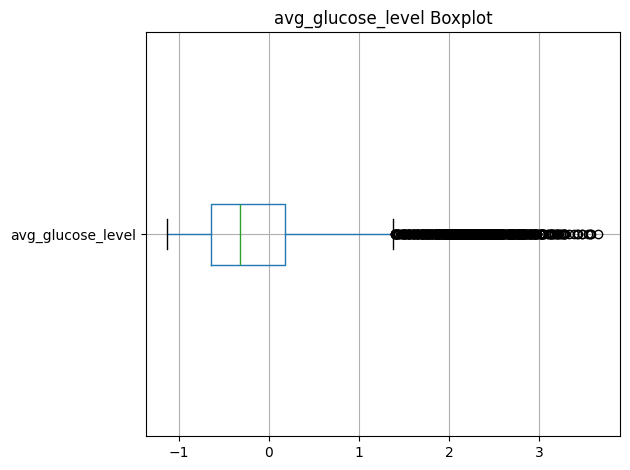

In [25]:
# EXPLORATORY DATA ANALYSIS : Age • BMI • Glucose
# ==============================================================

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# For convenience, pull out just the three key columns
eda_cols = ["age", "bmi", "avg_glucose_level"]
eda_df   = df_enc[eda_cols]      # df_enc = your cleaned, imputed dataframe

# --------------------------------------------------------------
# 1️⃣  UNIVARIATE ANALYSIS
# --------------------------------------------------------------
for col in eda_cols:
    # Summary stats
    print(f"\n{col.upper()}  ──────────────────────────────────")
    print(eda_df[col].describe(), "\n")

    # Histogram
    plt.figure()
    eda_df[col].hist(bins=30, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    # Box-plot
    plt.figure()
    eda_df.boxplot(column=col, vert=False)
    plt.title(f"{col} Boxplot")
    plt.tight_layout()
    plt.show()


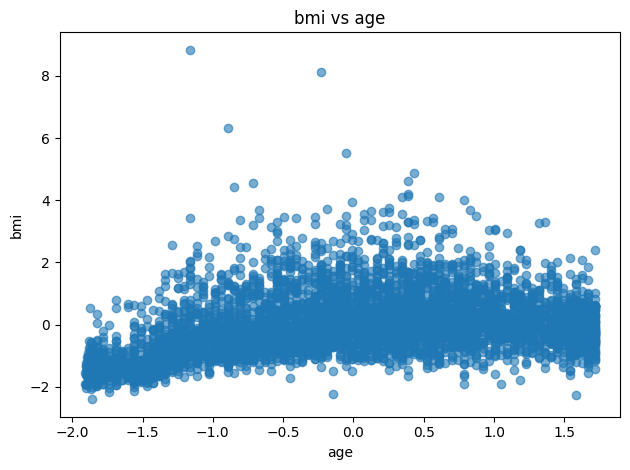

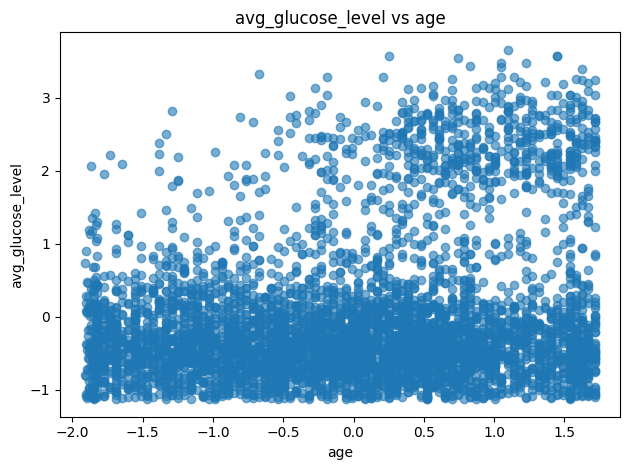

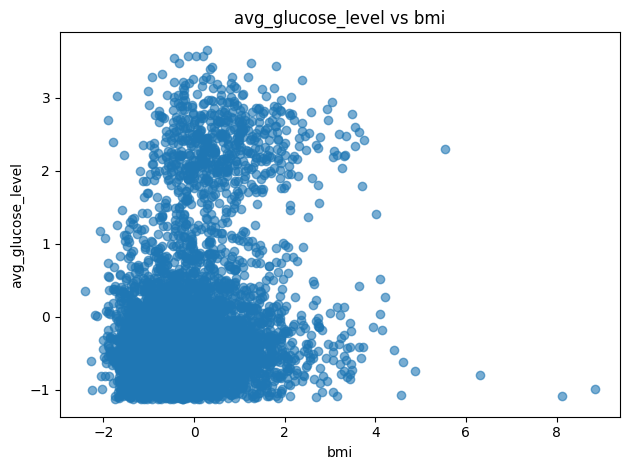


Pearson correlation matrix:
                     age    bmi  avg_glucose_level
age                1.000  0.334              0.238
bmi                0.334  1.000              0.184
avg_glucose_level  0.238  0.184              1.000


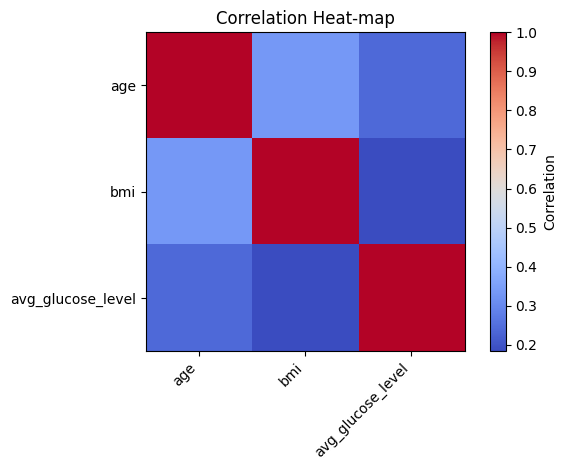

In [48]:
# 2️⃣  BIVARIATE ANALYSIS
# --------------------------------------------------------------
pairs = [("age", "bmi"),
         ("age", "avg_glucose_level"),
         ("bmi", "avg_glucose_level")]

for x, y in pairs:
    plt.figure()
    plt.scatter(eda_df[x], eda_df[y], alpha=0.6)
    plt.title(f"{y} vs {x}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

# Correlation matrix (numeric)
corr = eda_df.corr(numeric_only=True)
print("\nPearson correlation matrix:")
print(corr.round(3))

# Simple heat-map of correlations
plt.figure()
plt.imshow(corr, cmap="coolwarm", interpolation="none")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heat-map")
plt.tight_layout()
plt.show()

In [49]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Jaison\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [29]:
from scipy.stats import ttest_ind, chi2_contingency, pointbiserialr
import pingouin as pg  # optional, for point-biserial correlation

In [33]:
import seaborn as sns

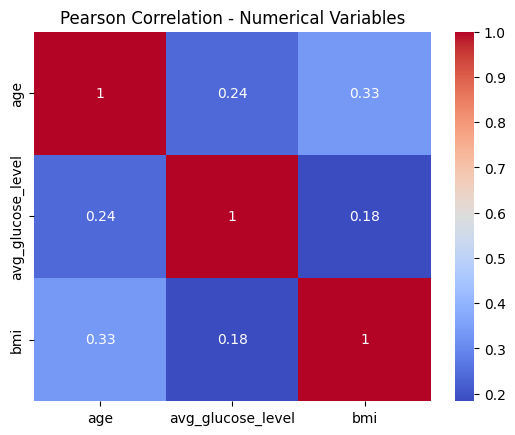

In [44]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
corr_matrix = eda_df[numerical_cols].corr(method='pearson')

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation - Numerical Variables")
plt.show()

In [57]:
for col in numerical_cols:
    r, p = pointbiserialr(df['stroke'], df[col])
    print(f"{col} vs stroke: Point-Biserial r = {r:.3f}, p = {p:.3f}")

age vs stroke: Point-Biserial r = 0.245, p = 0.000
avg_glucose_level vs stroke: Point-Biserial r = 0.132, p = 0.000
bmi vs stroke: Point-Biserial r = 0.039, p = 0.006


In [58]:
for col in numerical_cols:
    stroke_yes = df[df['stroke'] == 1][col]
    stroke_no =df[df['stroke'] == 0][col]
    stat, p = ttest_ind(stroke_yes, stroke_no)
    print(f"T-test for {col}: p-value = {p:.3f}")

T-test for age: p-value = 0.000
T-test for avg_glucose_level: p-value = 0.000
T-test for bmi: p-value = 0.006


In [60]:
categorical_cols = [col for col in df.columns if col not in numerical_cols + ['stroke']]

for col in categorical_cols:
    contingency = pd.crosstab(df[col],df['stroke'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square for {col}: p-value = {p:.3f}")

Chi-square for id: p-value = 0.493
Chi-square for gender: p-value = 0.790
Chi-square for hypertension: p-value = 0.000
Chi-square for heart_disease: p-value = 0.000
Chi-square for ever_married: p-value = 0.000
Chi-square for work_type: p-value = 0.000
Chi-square for Residence_type: p-value = 0.298
Chi-square for smoking_status: p-value = 0.000


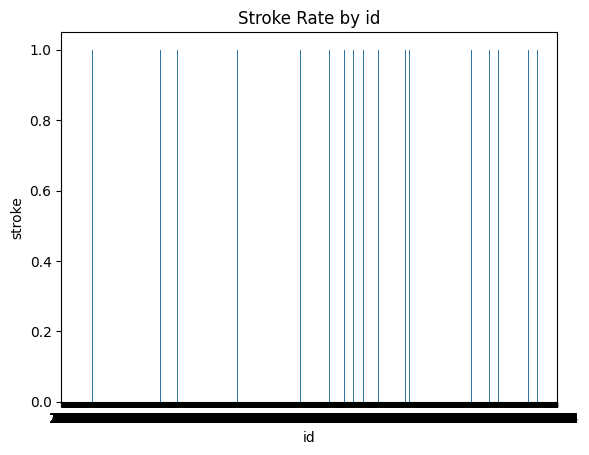

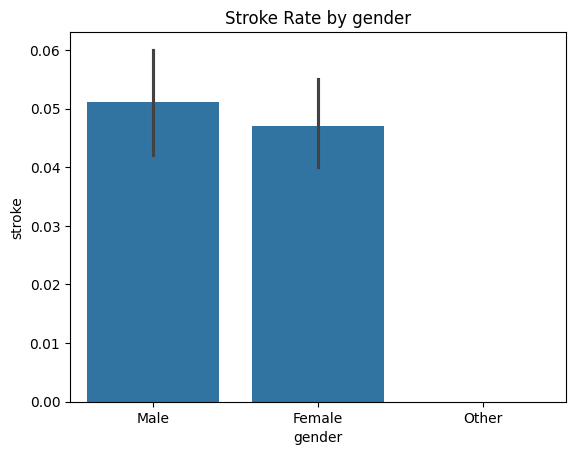

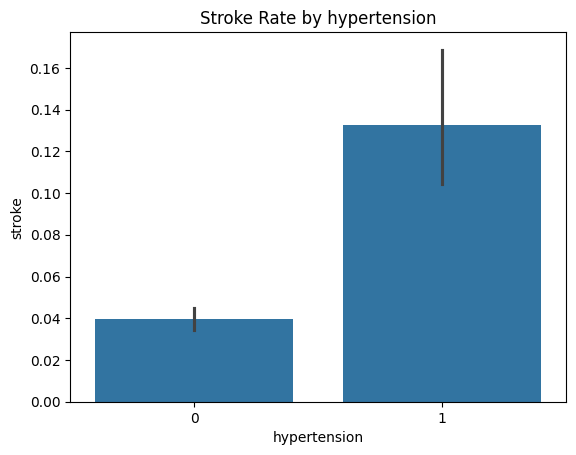

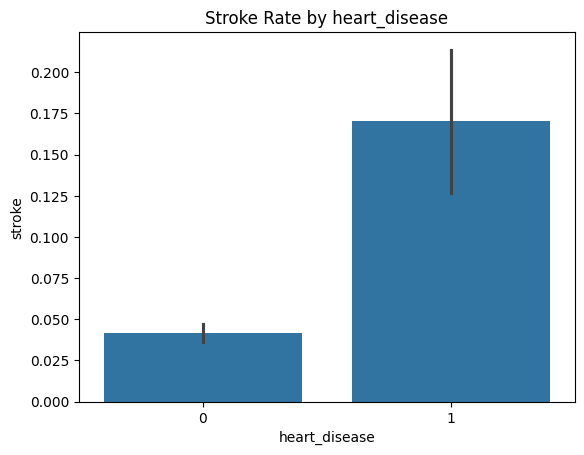

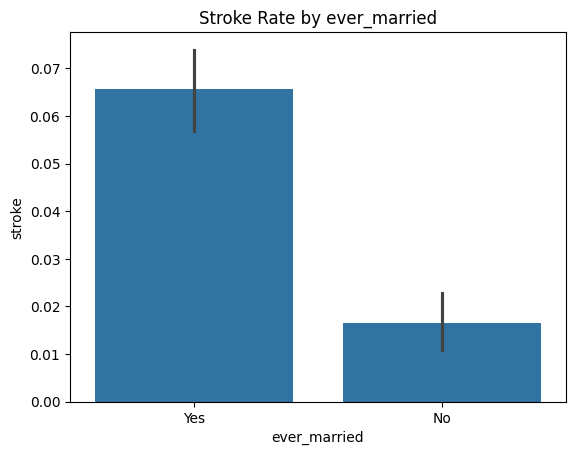

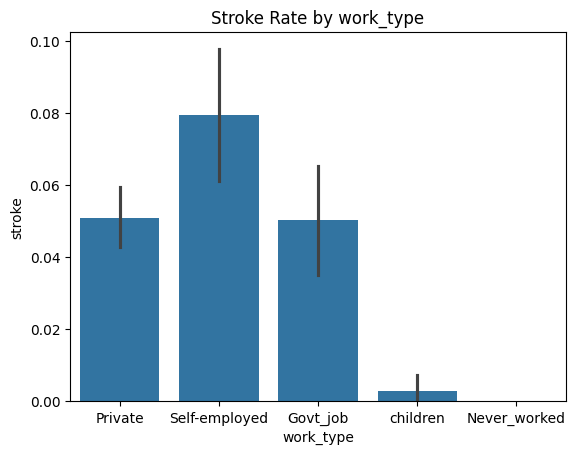

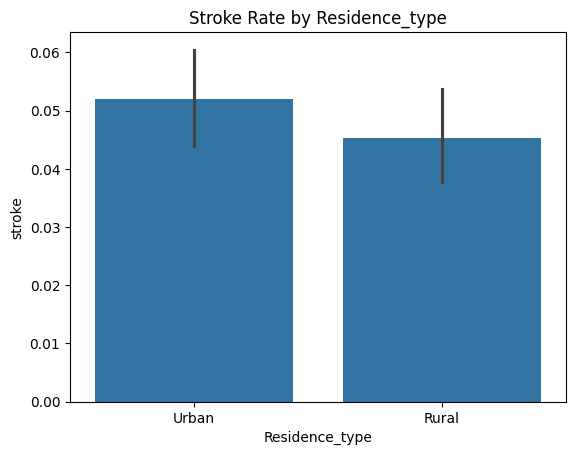

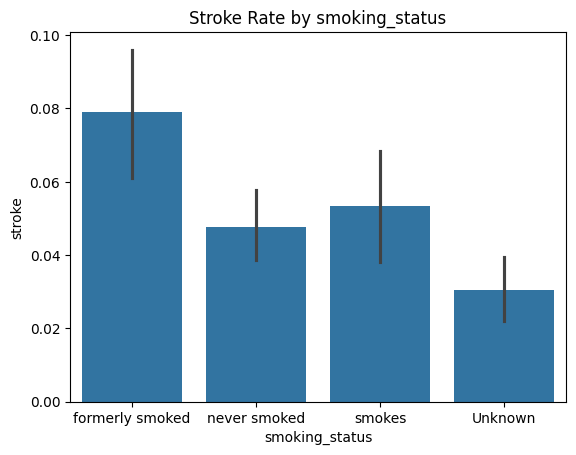

In [61]:
for col in categorical_cols:
    sns.barplot(x=col, y='stroke', data=df)
    plt.title(f"Stroke Rate by {col}")
    plt.show()

<Figure size 640x480 with 0 Axes>

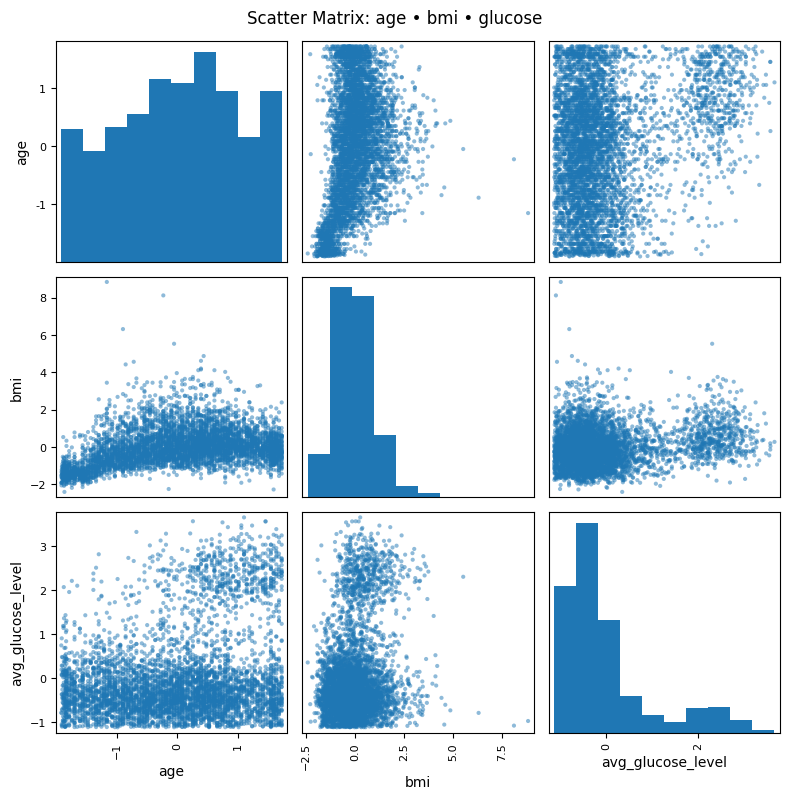

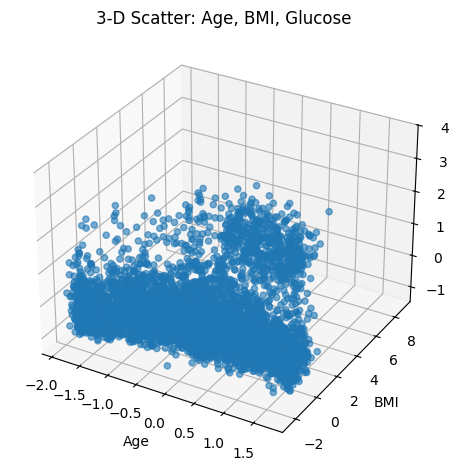

In [39]:

plt.figure()
scatter_matrix(eda_df, alpha=0.5, figsize=(8, 8), diagonal="hist")
plt.suptitle("Scatter Matrix: age • bmi • glucose")
plt.tight_layout()
plt.show()

# (b) 3-D scatter plot
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

fig = plt.figure()
ax  = fig.add_subplot(111, projection="3d")
ax.scatter(eda_df["age"],
           eda_df["bmi"],
           eda_df["avg_glucose_level"],
           alpha=0.6)
ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.set_zlabel("Glucose")
ax.set_title("3-D Scatter: Age, BMI, Glucose")
plt.tight_layout()
plt.show()

stroke
0    4861
1     249
Name: count, dtype: int64

Class proportions:
stroke
0    0.951272
1    0.048728
Name: count, dtype: float64


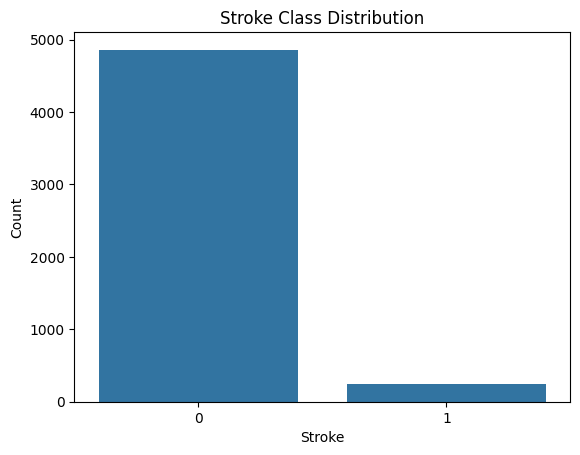

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

stroke_counts = df_enc['stroke'].value_counts()
print(stroke_counts)
print("\nClass proportions:")
print(stroke_counts / len(df))

sns.countplot(x='stroke', data=df_enc)
plt.title('Stroke Class Distribution')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

In [42]:
!pip install imbalanced-learn

     -------------------------------------- 258.3/258.3 KB 8.0 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Jaison\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [63]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split features and target
X = df_enc.drop(columns=['stroke'])
y = df_enc['stroke']

# Train-test split before balancing to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_bal.value_counts())

Before SMOTE: stroke
0    3889
1     199
Name: count, dtype: int64
After SMOTE: stroke
0    3889
1    3889
Name: count, dtype: int64


In [65]:
df_enc.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1.051434,-0.328602,4.185032,2.706375,0.985870,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,51676,0.786070,-0.328602,-0.238947,2.121559,0.489952,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,1.626390,-0.328602,4.185032,-0.005028,0.458064,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60182,0.255342,-0.328602,-0.238947,1.437358,0.702657,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1665,1.582163,3.043196,-0.238947,1.501184,-0.636168,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [75]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [80]:
X = X_train_bal.drop(columns=["id"])
y = y_train_bal

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [85]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [86]:
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[727 246]
 [139 833]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       973
           1       0.77      0.86      0.81       972

    accuracy                           0.80      1945
   macro avg       0.81      0.80      0.80      1945
weighted avg       0.81      0.80      0.80      1945


Accuracy Score: 0.8020565552699229


5-fold CV AUROC: 0.993 ± 0.002

─── CLASSIFICATION REPORT (TEST) ───
              precision    recall  f1-score   support

           0      0.950     0.994     0.971       778
           1      0.993     0.947     0.970       778

    accuracy                          0.970      1556
   macro avg      0.971     0.970     0.970      1556
weighted avg      0.971     0.970     0.970      1556

Test AUROC: 0.991


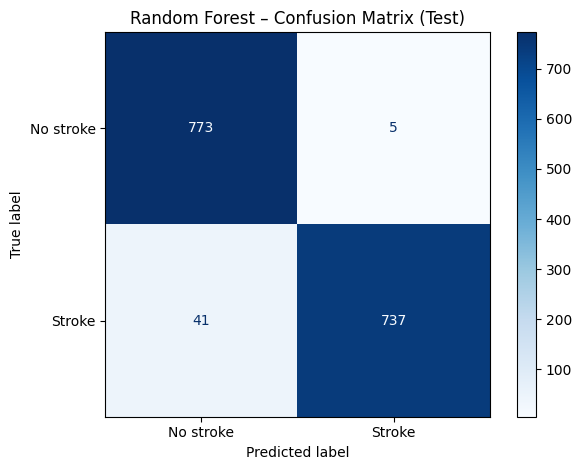

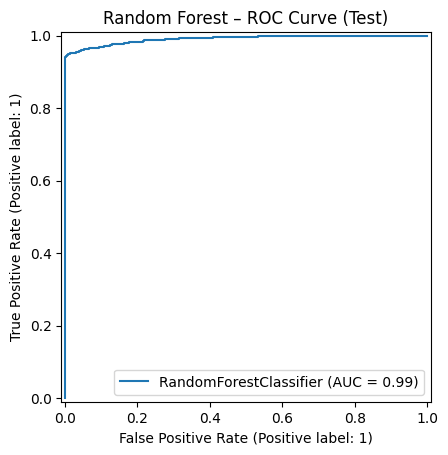

In [90]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, roc_auc_score,
                             confusion_matrix, ConfusionMatrixDisplay,
                             RocCurveDisplay)


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size    = 0.20,
    stratify     = y,
    random_state = 42
)

# ----------------------------------------------------------------
# 3  RANDOM-FOREST  (basic hyper-params – tweak as you like)
# ----------------------------------------------------------------
rf = RandomForestClassifier(
        n_estimators     = 400,
        max_depth        = None,
        min_samples_leaf = 2,
        n_jobs           = -1,
        random_state     = 42
     )

# ----------------------------------------------------------------
# 4  5-FOLD STRATIFIED CROSS-VALIDATION (AUROC)
# ----------------------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(rf, X_train, y_train,
                         cv=cv, scoring="roc_auc", n_jobs=-1)
print(f"5-fold CV AUROC: {cv_auc.mean():.3f} ± {cv_auc.std():.3f}")

# ----------------------------------------------------------------
# 5  FIT ON FULL TRAIN  →  EVALUATE ON HELD-OUT TEST SET
# ----------------------------------------------------------------
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print("\n─── CLASSIFICATION REPORT (TEST) ───")
print(classification_report(y_test, y_pred, digits=3))
print(f"Test AUROC: {roc_auc_score(y_test, y_prob):.3f}")

# Confusion-matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
ConfusionMatrixDisplay(cm, display_labels=["No stroke", "Stroke"]) \
    .plot(cmap="Blues")
plt.title("Random Forest – Confusion Matrix (Test)")
plt.tight_layout()
plt.show()

# ROC curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest – ROC Curve (Test)")
plt.show()

In [92]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 2: Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can also use 'rbf' kernel
svm_model.fit(X_train, y_train)  # Fit the model with training data

# Step 3: Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Step 4: Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))  # Shows precision, recall, f1-score for each class

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))  # Shows confusion matrix


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       778
           1       0.76      0.90      0.83       778

    accuracy                           0.81      1556
   macro avg       0.82      0.81      0.81      1556
weighted avg       0.82      0.81      0.81      1556


Confusion Matrix:
[[557 221]
 [ 74 704]]
